# Trinh Tran - Machine Learning In Class Activity 4

# Part 1

In [17]:
from scipy.ndimage import shift
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
X_train.shape

(60000, 28, 28)

In [6]:
images = X_train
labels = y_train

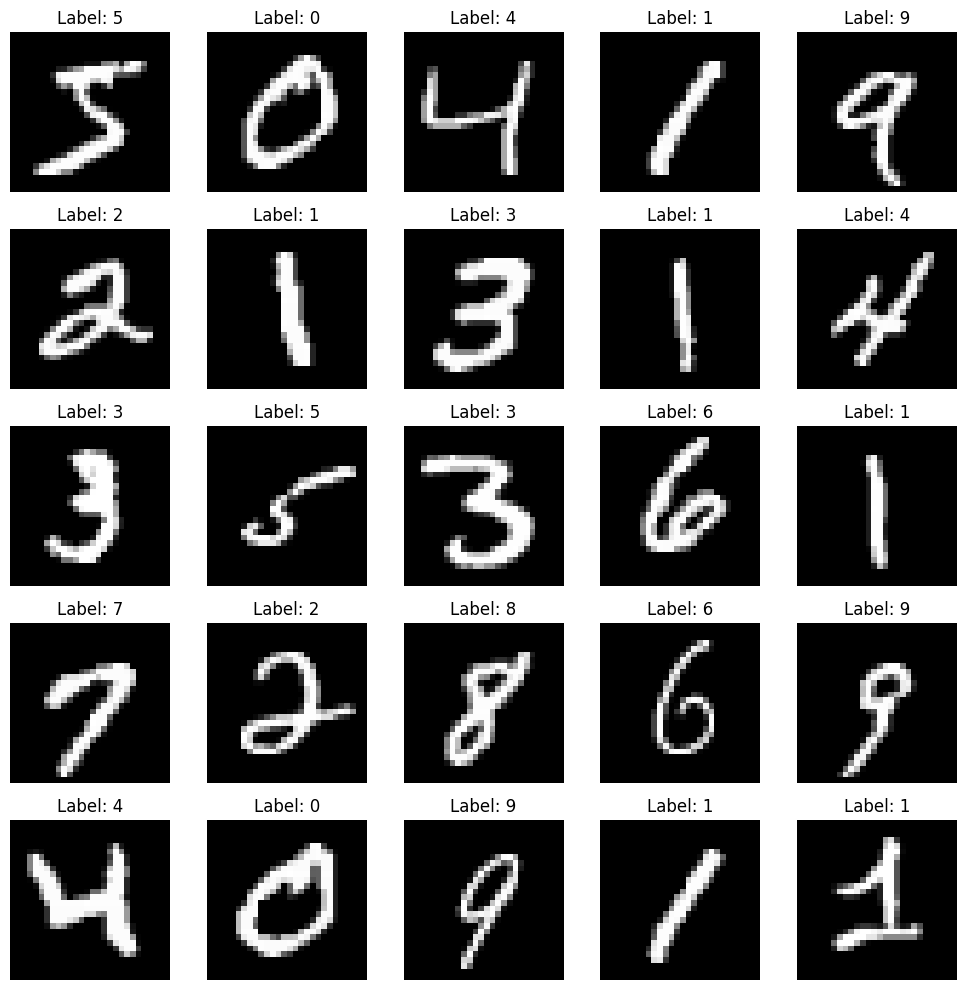

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
for i in range(25):
  ax = axes[i // 5, i % 5]
  ax.imshow(images[i], cmap='gray')
  ax.set_title(f"Label: {labels[i]}")
  ax.axis('off')
plt.tight_layout()
plt.show()

In [12]:
def shift_image (image, direction):
  offsets = {
      "up": [-1, 0],
      "down": [1, 0],
      "left": [0, -1],
      "right": [0, 1]
  }
  if direction not in offsets:
    return image
  image_2d = image.reshape(28, 28)
  shifted_2d = shift (image_2d, offsets[direction], cval=0, mode="constant")
  return shifted_2d.reshape([-1])

In [14]:
X_train_expanded = []
y_train_expanded = []

for image, label in zip(X_train, y_train):
    for dir in ['up', 'down', 'left', 'right']:
        shifted = shift_image(image, dir)
        X_train_expanded.append(shifted)
        y_train_expanded.append(label)

X_train_expanded = np.array(X_train_expanded)
y_train_expanded = np.array(y_train_expanded)

In [15]:
X_train_expanded.shape

(240000, 784)

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf_augmented = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest_clf_augmented.fit(X_train_expanded, y_train_expanded)

# Flatten X_test before making predictions
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

y_pred = forest_clf_augmented.predict(X_test_flattened)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion matrix:
[[ 973    0    0    0    0    1    3    1    2    0]
 [   0 1123    2    3    0    1    1    2    3    0]
 [   1    0 1015    2    1    0    1    6    5    1]
 [   0    0    5  985    0    4    0    7    8    1]
 [   1    0    2    0  954    0    5    1    3   16]
 [   2    0    0    9    2  869    3    1    4    2]
 [   6    4    0    0    4    3  939    0    2    0]
 [   1    3   10    0    0    0    0 1000    3   11]
 [   4    0    1    2    3    5    1    2  951    5]
 [   5    3    2    6    6    2    0    4    5  976]]
Accuracy: 0.9785


# Part 2

The initial problem is that the picture is not always easy to predict, sometimes it will on the left, or on other sides. Therefore, I learned to shift images to many directions so that the model can learn from these images and predict better.
I tried the Random Forest model. It took arround 5 minutes to complete the training. It had a very good accuracy, which is 97.85%.